In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

In [4]:
import random

In [5]:
tf.set_random_seed(777)  # reproducibility

In [6]:
# parameters
log_dir = './logs/ML_Lab_10-01-Softmax'
learning_rate = 0.001
batch_size = 100
num_epochs = 100

In [7]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
print(mnist.train.num_examples)

55000


In [9]:
nb_classes = 10

In [10]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 784] , name='X')

In [11]:
Y = tf.placeholder(dtype=tf.float32, shape=[None, nb_classes], name='Y')

In [12]:
with tf.variable_scope('softmax') as scope:
    W = tf.Variable(tf.random_normal(shape=[784, nb_classes]), shape=[784, nb_classes], dtype=tf.float32, name='weight')
    b = tf.Variable(tf.random_normal(shape=[nb_classes]), shape=[nb_classes], dtype=tf.float32, name='bias')
    logits = tf.matmul(X, W) + b
    hypothesis = tf.nn.softmax(logits)

    tf.summary.histogram("W", W)
    tf.summary.histogram("b", b)
    tf.summary.histogram("softmax", logits)

In [13]:
with tf.variable_scope('cost') as scope:
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
    tf.summary.scalar('cost', cost)

In [14]:
with tf.variable_scope('Train') as scope:
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [15]:
with tf.variable_scope('accuracy') as scope:
    is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.arg_max(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    tf.summary.scalar('accuracy', accuracy)

Instructions for updating:
Use `tf.math.argmax` instead


Epoch: 0001 cost = 5.745171013
Accuracy:  0.5672
Epoch: 0002 cost = 1.780056718
Accuracy:  0.7327
Epoch: 0003 cost = 1.122778639
Accuracy:  0.7984
Epoch: 0004 cost = 0.872012252
Accuracy:  0.8304
Epoch: 0005 cost = 0.738203181
Accuracy:  0.8531
Epoch: 0006 cost = 0.654728886
Accuracy:  0.8674
Epoch: 0007 cost = 0.596023610
Accuracy:  0.8769
Epoch: 0008 cost = 0.552216819
Accuracy:  0.8827
Epoch: 0009 cost = 0.518254963
Accuracy:  0.8879
Epoch: 0010 cost = 0.491113199
Accuracy:  0.8901
Epoch: 0011 cost = 0.468347538
Accuracy:  0.8936
Epoch: 0012 cost = 0.449374352
Accuracy:  0.8987
Epoch: 0013 cost = 0.432675664
Accuracy:  0.8979
Epoch: 0014 cost = 0.418828155
Accuracy:  0.9023
Epoch: 0015 cost = 0.406128932
Accuracy:  0.9023
Epoch: 0016 cost = 0.394982938
Accuracy:  0.9051
Epoch: 0017 cost = 0.385870417
Accuracy:  0.9057
Epoch: 0018 cost = 0.376135583
Accuracy:  0.9082
Epoch: 0019 cost = 0.368269375
Accuracy:  0.9095
Epoch: 0020 cost = 0.361209771
Accuracy:  0.9089
Epoch: 0021 cost = 0

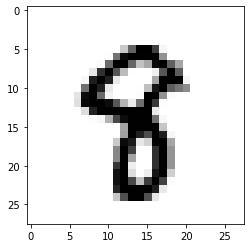

In [16]:
with tf.Session() as sess:
    # tensorboard --logdir=./logs/Deep_NN
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter(log_dir)
    writer.add_graph(sess.graph)
    
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, train], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch        
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
        # Test he model using test sets
        print('Accuracy: ', accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y: mnist.test.labels}))
        
        summary = sess.run(merged_summary, feed_dict={X:mnist.test.images, Y: mnist.test.labels})
        writer.add_summary(summary, global_step=(epoch))
        #print('Accuracy: ', sess.run(accuracy, feed_dict={X:mnist.test.images, Y: mnist.test.labels}))
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples -1)
   
    print('Label:', sess.run(tf.arg_max(mnist.test.labels[r:r+1], 1)))
    print(sess.run(hypothesis, feed_dict={X: mnist.test.images[r:r+1]}))
    print('Prediction:', sess.run(tf.arg_max(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()